In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import figure

In [14]:
pcap = pd.read_csv("Pcap_mlwdf/AP_pcap-32-0.csv")

In [15]:
pcap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51231 entries, 0 to 51230
Data columns (total 11 columns):
No.                      51231 non-null int64
Time                     51231 non-null float64
Source                   47956 non-null object
Destination              51231 non-null object
Protocol                 51231 non-null object
Packet Length            51231 non-null int64
Data Length              163 non-null object
Data rate (Mb/s)         11884 non-null float64
PHY type                 51231 non-null object
Signal strength (dBm)    21428 non-null object
Info                     35271 non-null object
dtypes: float64(2), int64(2), object(7)
memory usage: 4.3+ MB


In [16]:
pcap

,No.,Time,Source,Destination,Protocol,Packet Length,Data Length,Data rate (Mb/s),PHY type,Signal strength (dBm),Info
0,1,0.000000,00:00:00_00:00:21,Broadcast,802.11,219,NaN,6.0,802.11a,NaN,"Beacon frame, SN=0, FN=0, Flags=........C, BI=..."
1,2,0.021649,00:00:00_00:00:01,00:00:00_00:00:21,802.11,153,NaN,6.0,802.11a,-32dBm,"Association Request, SN=0, FN=0, Flags=.........."
2,3,0.021665,NaN,00:00:00_00:00:01 (00:00:00:00:00:01) (RA),802.11,36,NaN,6.0,802.11a,NaN,"Acknowledgement, Flags=........C"
3,4,0.021752,00:00:00_00:00:21,00:00:00_00:00:01,802.11,202,NaN,6.0,802.11a,NaN,"Association Response, SN=1, FN=0, Flags=........."
4,5,0.022076,NaN,00:00:00_00:00:21 (00:00:00:00:00:21) (RA),802.11,38,NaN,6.0,802.11a,-32dBm,"Acknowledgement, Flags=........C"
5,6,0.026016,00:00:00_00:00:21,Broadcast,ARP,88,NaN,6.0,802.11a,NaN,Who has 192.168.1.2? Tell 192.168.1.1
6,7,0.026382,00:00:00_00:00:01,00:00:00_00:00:21,802.11,61,NaN,6.0,802.11a,-32dBm,"Action, SN=1, FN=0, Flags=........C"
7,8,0.026398,NaN,00:00:00_00:00:01 (00:00:00:00:00:01) (RA),802.11,36,NaN,6.0,802.11a,NaN,"Acknowledgement, Flags=........C"
8,9,0.026485,00:00:00_00:00:21,00:00:00_00:00:01,802.11,59,NaN,6.0,802.11a,NaN,"Action, SN=3, FN=0, Flags=........C"
9,10,0.026621,NaN,00:00:00_00:00:21 (00:00:00:00:00:21) (RA),802.11,38,NaN,6.0,802.11a,-32dBm,"Acknowledgement, Flags=........C"


## Identifying no of unique clients in one OFDMA frame transmission and also calculating OFDMA frame transmission time

In [17]:
time = pcap['Time'].tolist()
destination = pcap['Destination'].tolist()
info = pcap['Info'].tolist()
source = pcap['Source'].tolist()
protocol = pcap['Protocol'].tolist()
packet_length = pcap['Packet Length'].tolist()

In [18]:
#info[0].startswith('BeaCon')

In [20]:
time_slot = 1

global_avg = 0
global_no_of_frames = 0

local_avg = 0
no_of_frames = 0

dict1 = dict()
x=[]
y=[]

#average time diff for distinct no. of unique destinations
dict2 = dict()

for index, i in enumerate(time):
    if i >= time_slot:
        x.append(time_slot)
        if no_of_frames != 0:
            y.append(local_avg/no_of_frames)
            print("Average for time slot [", time_slot-1, time_slot, ") is: ", local_avg/no_of_frames)
        else :
            y.append(0)
        global_no_of_frames += no_of_frames
        global_avg += local_avg
        no_of_frames = 0
        local_avg = 0
        time_slot += 1
    
    if type(info[int(index)]) != float:
        if info[int(index)].startswith('Trigger'):
            for j in reversed(range(int(index))):
                if time[int(index-1)] == time[j]:
                    if protocol[j] == 'TCP' or protocol[j] == 'Gryphon':
                        if source[j] == '192.168.1.1':
                            time_diff = time[int(index)] - time[int(index-1)]
                            if time[int(index-1)] not in dict1:
                                no_of_frames += 1
                                dict1[time[int(index-1)]] = set()
                            dict1[time[int(index-1)]].add(destination[j])
                else:
                    break
            if time[int(index-1)] in dict1:
                local_avg += len(dict1[time[int(index-1)]])
                if len(dict1[time[int(index-1)]]) not in dict2:
                    dict2[len(dict1[time[int(index-1)]])] = []
                dict2[len(dict1[time[int(index-1)]])].append(time_diff)
print("Global is: ", global_avg/global_no_of_frames)
print(dict2)
#print(y)

Average for time slot [ 0 1 ) is:  1.0
Average for time slot [ 1 2 ) is:  1.0
Average for time slot [ 2 3 ) is:  1.1081081081081081
Average for time slot [ 3 4 ) is:  1.1554621848739495
Average for time slot [ 4 5 ) is:  1.4685990338164252
Average for time slot [ 5 6 ) is:  1.9271255060728745
Average for time slot [ 6 7 ) is:  1.4194915254237288
Average for time slot [ 7 8 ) is:  2.177700348432056
Average for time slot [ 8 9 ) is:  6.380952380952381
Average for time slot [ 9 10 ) is:  6.516129032258065
Average for time slot [ 10 11 ) is:  6.294117647058823
Average for time slot [ 11 12 ) is:  6.25531914893617
Average for time slot [ 12 13 ) is:  6.34054054054054
Average for time slot [ 13 14 ) is:  6.462765957446808
Average for time slot [ 14 15 ) is:  6.190476190476191
Average for time slot [ 15 16 ) is:  6.5
Average for time slot [ 16 17 ) is:  6.23404255319149
Average for time slot [ 17 18 ) is:  6.218085106382978
Average for time slot [ 18 19 ) is:  5.35625
Average for time slot [ 

In [21]:
x1 = []
y1 = []
for key,value in sorted(dict2.items()):
    x1.append(key)
    y1.append(sum(value)/len(value))

In [22]:
x1

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [23]:
y1

[0.0008773333333333492,
 0.0034061469648561755,
 0.003996592592592597,
 0.003974236966824471,
 0.004249745664739874,
 0.00452986770428025,
 0.004618298568507079,
 0.00486593230769222,
 0.0049227536231883275]

In [24]:
## converting time to millisec
for index,i in enumerate(y1):
    y1[index] = i * 1000
y1

[0.8773333333333492,
 3.4061469648561755,
 3.996592592592597,
 3.974236966824471,
 4.249745664739875,
 4.52986770428025,
 4.618298568507079,
 4.86593230769222,
 4.922753623188328]

## Plotting OFDMA frame transmission time

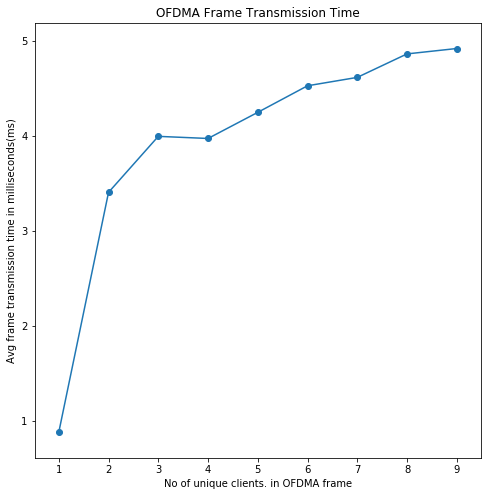

In [25]:
plt.plot(x1, y1)
plt.scatter (x1,y1)
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('No of unique clients. in OFDMA frame')
plt.ylabel("Avg frame transmission time in milliseconds(ms)")
plt.title("OFDMA Frame Transmission Time")

fig = plt.gcf()
fig.set_size_inches(8,8)
plt.show()

## Plotting no. of unique clients put in one OFDMA frame transmission wrt time 

In [148]:
x[:20]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [149]:
y[:20]

[1.0,
 1.0,
 1.1081081081081081,
 1.1554621848739495,
 1.4685990338164252,
 1.9271255060728745,
 1.4194915254237288,
 2.177700348432056,
 6.380952380952381,
 6.516129032258065,
 6.294117647058823,
 6.25531914893617,
 6.34054054054054,
 6.462765957446808,
 6.190476190476191,
 6.5,
 6.23404255319149,
 6.218085106382978,
 5.35625,
 0]

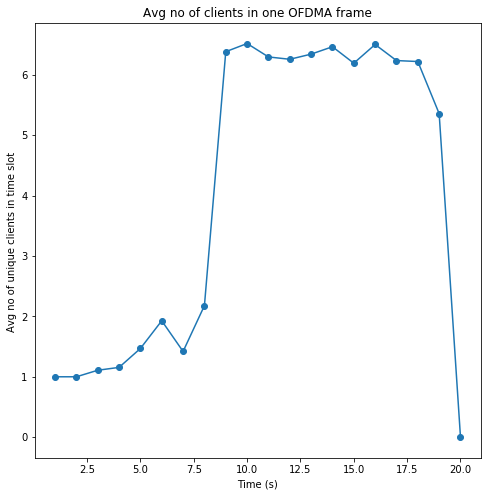

In [150]:
plt.scatter(x[:20], y[:20])
plt.plot(x[:20], y[:20])
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Time (s)')
plt.ylabel("Avg no of unique clients in time slot ")
plt.title("Avg no of clients in one OFDMA frame")

fig = plt.gcf()
fig.set_size_inches(8,8)
plt.show()

## Throughput

In [29]:
bulk_client_list = ['192.168.1.3','192.168.1.7','192.168.1.11','192.168.1.15','192.168.1.19','192.168.1.23','192.168.1.27','192.168.1.31']
dict_throughput = dict()
total_time = float(pcap['Time'].tail(1))

for index, i in enumerate(time):
    if type(info[int(index)]) != float:
        if info[int(index)].startswith('Trigger'):
            total_packet_sent = 0
            unique_clients = set()
            #bulk_client_present = False
            for j in reversed(range(int(index))):
                if time[int(index-1)] == time[j]:
                    if protocol[j] == 'TCP' or protocol[j] == 'Gryphon':
                        if source[j] == '192.168.1.1':
                            unique_clients.add(destination[j])
                            total_packet_sent += packet_length[j]
                else:
                    break
            
            if unique_clients.intersection(bulk_client_list) != set():
                if len(unique_clients) not in dict_throughput:
                    dict_throughput[len(unique_clients)] = 0
                dict_throughput[len(unique_clients)] += total_packet_sent
           
print(dict_throughput)
#print(y)

{1: 10358138, 4: 297080, 5: 166484, 2: 3567894, 3: 1549584, 7: 39286, 9: 50192, 8: 34718, 6: 840}


In [30]:
x2 = []
y2 = []
for key,value in sorted(dict_throughput.items()):
    x2.append(key)
    y2.append(value/total_time)

In [31]:
x2

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [32]:
y2

[93401.37710641736,
 32172.40521121884,
 13972.90512465374,
 2678.8290627885503,
 1501.2191251154202,
 7.574445983379502,
 354.2496248845799,
 313.0590662511542,
 452.59118190212376]

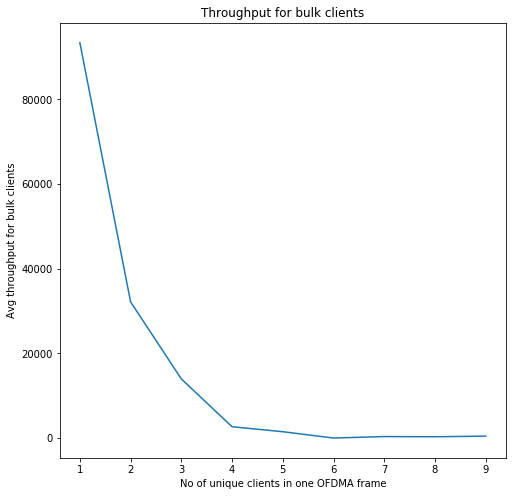

In [34]:
plt.plot(x2, y2)
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('No of unique clients in one OFDMA frame')
plt.ylabel("Avg throughput for bulk clients")
plt.title("Throughput for bulk clients")

fig = plt.gcf()
fig.set_size_inches(8,8)
plt.show()


## Throughput w.r.t. time

In [35]:
window = 2  #set time window
x_t = []
y_t = []

In [36]:
data_transferred = 0
slot = window
for i,t in enumerate(time):
    if t > slot:
        x_t.append(slot)
        y_t.append(data_transferred/slot)
        slot += window
    if destination[i] in bulk_client_list:
        if source[i] == '192.168.1.1':
            if packet_length[i]:
                data_transferred += packet_length[i]

In [37]:
x_t

[2,
 4,
 6,
 8,
 10,
 12,
 14,
 16,
 18,
 20,
 22,
 24,
 26,
 28,
 30,
 32,
 34,
 36,
 38,
 40,
 42,
 44,
 46,
 48,
 50,
 52,
 54,
 56,
 58,
 60,
 62,
 64,
 66,
 68,
 70,
 72,
 74,
 76,
 78,
 80,
 82,
 84,
 86,
 88,
 90,
 92,
 94,
 96,
 98,
 100,
 102,
 104,
 106,
 108,
 110]

In [38]:
y_t

[1743943.0,
 1753239.5,
 1777882.3333333333,
 1779893.25,
 1424026.6,
 1186688.8333333333,
 1017161.8571428572,
 890016.625,
 791125.8888888889,
 712013.3,
 647354.8181818182,
 593408.5833333334,
 547761.7692307692,
 508635.9285714286,
 474726.86666666664,
 445056.4375,
 418876.64705882355,
 395605.72222222225,
 374784.36842105264,
 356045.15,
 339090.61904761905,
 323677.4090909091,
 309637.95652173914,
 296736.375,
 284866.92,
 273910.5,
 263765.6666666667,
 254345.4642857143,
 245574.93103448275,
 237389.1,
 229731.38709677418,
 222552.28125,
 215808.27272727274,
 209460.9705882353,
 203476.37142857144,
 197824.25,
 192477.64864864864,
 187412.44736842104,
 182607.0,
 178041.825,
 173699.34146341463,
 169563.64285714287,
 165620.3023255814,
 161856.20454545456,
 158259.4,
 154818.97826086957,
 151541.3404255319,
 148384.22916666666,
 145355.97959183675,
 142448.86,
 139655.74509803922,
 136970.0576923077,
 134385.71698113208,
 131897.09259259258,
 129498.96363636364]

In [39]:
## converting to MegaBytes
for index,i in enumerate(y_t):
    y_t[index] = i / 1000000

In [40]:
y_t

[1.743943,
 1.7532395,
 1.7778823333333333,
 1.77989325,
 1.4240266000000001,
 1.1866888333333332,
 1.0171618571428571,
 0.890016625,
 0.7911258888888889,
 0.7120133000000001,
 0.6473548181818183,
 0.5934085833333334,
 0.5477617692307692,
 0.5086359285714286,
 0.47472686666666664,
 0.4450564375,
 0.41887664705882355,
 0.39560572222222223,
 0.3747843684210526,
 0.35604515000000003,
 0.33909061904761906,
 0.32367740909090914,
 0.30963795652173914,
 0.296736375,
 0.28486691999999997,
 0.2739105,
 0.2637656666666667,
 0.2543454642857143,
 0.24557493103448275,
 0.23738910000000002,
 0.22973138709677418,
 0.22255228125,
 0.21580827272727274,
 0.2094609705882353,
 0.20347637142857145,
 0.19782425,
 0.19247764864864864,
 0.18741244736842103,
 0.182607,
 0.17804182500000001,
 0.17369934146341462,
 0.16956364285714287,
 0.1656203023255814,
 0.16185620454545455,
 0.1582594,
 0.15481897826086957,
 0.1515413404255319,
 0.14838422916666666,
 0.14535597959183674,
 0.14244885999999998,
 0.139655745098

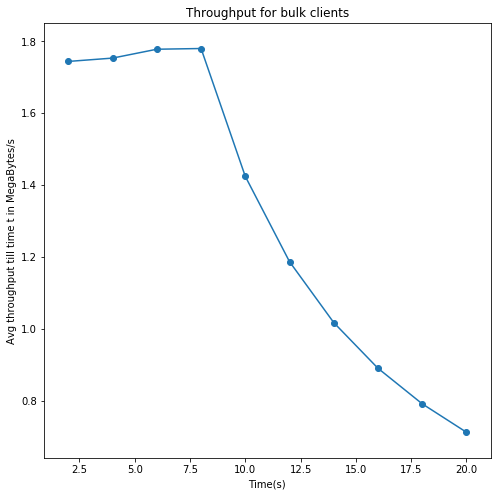

In [87]:
plt.plot(x_t[:10], y_t[:10])
plt.scatter(x_t[:10],y_t[:10])
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Time(s)')
plt.ylabel("Avg throughput till time t in MegaBytes/s")
plt.title("Throughput for bulk clients")

fig = plt.gcf()
fig.set_size_inches(8,8)
plt.show()

## Delay/Jitter

In [172]:
on_off_clients = ['192.168.1.2','192.168.1.5','192.168.1.6','192.168.1.9','192.168.1.10','192.168.1.13','192.168.1.14','192.168.1.17','192.168.1.18','192.168.1.21','192.168.1.22','192.168.1.25','192.168.1.26','192.168.1.29','192.168.1.30']

In [173]:
on_off_clients_1 = ['192.168.1.2','192.168.1.6','192.168.1.10','192.168.1.14','192.168.1.18','192.168.1.22','192.168.1.26','192.168.1.30']

In [174]:
on_off_clients_2 = ['192.168.1.5','192.168.1.9','192.168.1.13','192.168.1.17','192.168.1.21','192.168.1.25','192.168.1.29']

In [175]:
dict_delay = dict()
delay_list = []
window = 1
timeslot = window
x_dt = []
y_dt = []
x_jt = []
y_jt = []
for index, i in enumerate(time):
    if i > timeslot:
        if len(delay_list) != 0:
            avg_delay = sum(delay_list)/len(delay_list)
        else:
            avg_delay = 0
        x_dt.append(timeslot)
        y_dt.append(avg_delay)
        
        jitter_list = []
        for i,v in enumerate(delay_list):
            if i+1 != len(delay_list):
                jitter_list.append(delay_list[i+1] - delay_list[i])
        
        if len(jitter_list) != 0:
            avg_jitter = sum(jitter_list)/len(jitter_list)
        else:
            avg_jitter = 0
        x_jt.append(timeslot)
        y_jt.append(avg_jitter)
            
        delay_list = []
        timeslot += window
        
    if type(info[int(index)]) != float:
        if info[int(index)].startswith('Trigger'):
            unique_clients = set()
            time_diff = 0
            #on_off_present = False
            
            for j in reversed(range(int(index))):
                if time[int(index-1)] == time[j]:
                    if protocol[j] == 'TCP' or protocol[j] == 'Gryphon':
                        if source[j] == '192.168.1.1':
                            time_diff = (time[int(index+1)] - time[int(index-1)])/2
                            unique_clients.add(destination[j])
                else:
                    break
                    
            if unique_clients.intersection(on_off_clients_2) != set():
                delay_list.append(time_diff)
                if len(unique_clients) not in dict_delay:
                    dict_delay[len(unique_clients)] = []
                dict_delay[len(unique_clients)].append(time_diff)

#print(dict_delay)
#print(y)
#for k,v in dict_delay.items():
 #   print("\n\n",k,v)

In [176]:
x_dt[:21]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]

In [177]:
y_dt[:21]

[0.00010600000000002274,
 0.00010599999999999499,
 0.00015866071428575053,
 0.0005485609756097538,
 0.0007582984693877415,
 0.0010785717592592947,
 0.0007814830097087282,
 0.0013177746478873437,
 0.0023912888888888996,
 0.002429817934782629,
 0.002414438235294145,
 0.0023961195652174197,
 0.002394931693989091,
 0.002423452380952392,
 0.0024128908045977075,
 0.002403336898395729,
 0.0024278681318680834,
 0.002413821212121203,
 0.0023505274725275547,
 0,
 0.0002963333333330098]

In [178]:
x_jt

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110]

In [179]:
y_jt[:21]

[5.551115123125783e-17,
 -1.1102230246251565e-16,
 -7.407407408442799e-08,
 -9.950980392155659e-06,
 6.746803069054067e-06,
 0.0,
 -4.332577657073782e-18,
 6.226415094342707e-06,
 -3.75418994413039e-06,
 -6.7431693989129374e-06,
 -6.165680473367451e-06,
 2.1857923500323014e-08,
 -1.0879120879079908e-06,
 3.5928143717596815e-08,
 -2.346820809258282e-06,
 -4.3010752689408845e-08,
 3.7679558011115007e-06,
 -2.390243902437353e-06,
 -1.1200000000026003e-05,
 0,
 -2.8000000007466497e-06]

In [180]:
## converting time to millisec
for index,i in enumerate(y_jt):
    y_jt[index] = i * 1000
y_jt

[5.551115123125783e-14,
 -1.1102230246251565e-13,
 -7.407407408442799e-05,
 -0.009950980392155659,
 0.006746803069054067,
 0.0,
 -4.3325776570737815e-15,
 0.006226415094342707,
 -0.00375418994413039,
 -0.006743169398912938,
 -0.006165680473367451,
 2.1857923500323015e-05,
 -0.001087912087907991,
 3.5928143717596816e-05,
 -0.0023468208092582822,
 -4.3010752689408844e-05,
 0.003767955801111501,
 -0.002390243902437353,
 -0.011200000000026003,
 0,
 -0.0028000000007466497,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -0.03428571428543137,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.0063999999994734935,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [181]:
## converting time to millisec
for index,i in enumerate(y_dt):
    y_dt[index] = i * 1000
y_dt

[0.10600000000002274,
 0.10599999999999499,
 0.15866071428575054,
 0.5485609756097538,
 0.7582984693877415,
 1.0785717592592947,
 0.7814830097087282,
 1.3177746478873438,
 2.3912888888888997,
 2.429817934782629,
 2.414438235294145,
 2.3961195652174196,
 2.394931693989091,
 2.423452380952392,
 2.4128908045977076,
 2.4033368983957293,
 2.4278681318680833,
 2.413821212121203,
 2.3505274725275545,
 0,
 0.2963333333330098,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.20250000000032742,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.24966666666514925,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

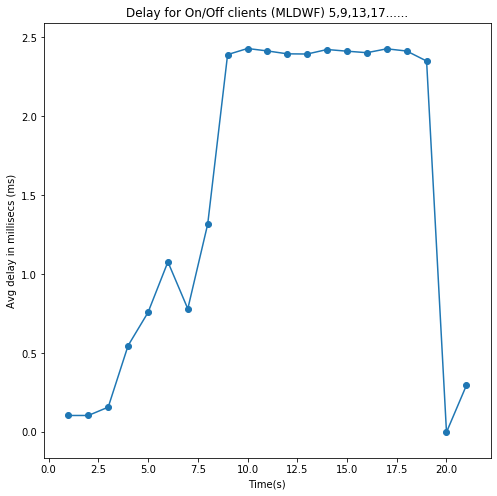

In [182]:
plt.plot(x_dt[:21], y_dt[:21])
plt.scatter(x_dt[:21],y_dt[:21])
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Time(s)')
plt.ylabel("Avg delay in millisecs (ms)")
plt.title("Delay for On/Off clients (MLDWF) 5,9,13,17......")

fig = plt.gcf()
fig.set_size_inches(8,8)
plt.show()

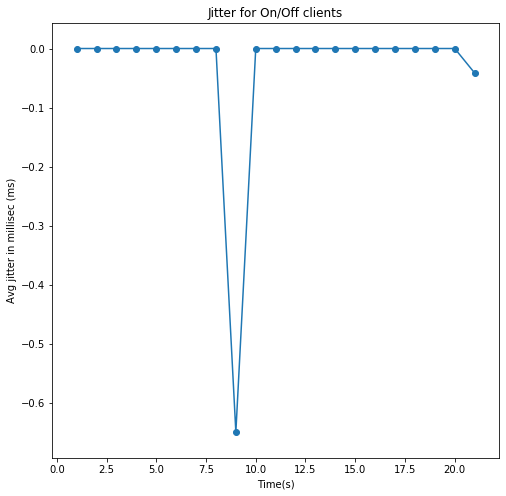

In [160]:
plt.plot(x_jt[:21], y_jt[:21])
plt.scatter(x_jt[:21],y_jt[:21])
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Time(s)')
plt.ylabel("Avg jitter in millisec (ms)")
plt.title("Jitter for On/Off clients")

fig = plt.gcf()
fig.set_size_inches(8,8)
plt.show()

In [45]:
x3 = []
y3 = []
for key,value in sorted(dict_delay.items()):
    x3.append(key)
    y3.append(sum(value)/len(value))

In [46]:
dict_jitter = {}
for key,value in sorted(dict_delay.items()):
    dict_jitter[key] = []
    for i,v in enumerate(value):
        if i+1 != len(value):
            dict_jitter[key].append(value[i+1] - value[i])

In [47]:
dict_delay

{1: [0.00010600000000000886,
  0.00010600000000000886,
  0.00010599999999999499,
  0.0001060000000000505,
  0.00010599999999993948,
  0.00010599999999993948,
  0.0001060000000000505,
  0.00010599999999993948,
  0.00010600000000016152,
  0.00010599999999993948,
  0.00015399999999998748,
  0.00015400000000020952,
  0.00015400000000020952,
  0.00015399999999998748,
  0.00015399999999998748,
  0.00015400000000020952,
  0.00015400000000020952,
  0.00015399999999998748,
  0.00015399999999998748,
  0.00015399999999998748,
  0.00015399999999998748,
  0.00015399999999998748,
  0.00015399999999998748,
  0.00015450000000005737,
  0.00015399999999998748,
  0.00015399999999998748,
  0.00015399999999998748,
  0.00015399999999998748,
  0.00015399999999998748,
  0.00015400000000020952,
  0.00015400000000020952,
  0.00015399999999998748,
  0.00015400000000020952,
  0.00015399999999998748,
  0.00010600000000016152,
  0.00010599999999993948,
  0.00010600000000016152,
  0.00010599999999993948,
  0.0008180

In [48]:
dict_jitter

{1: [0.0,
  -1.3877787807814457e-17,
  5.551115123125783e-17,
  -1.1102230246251565e-16,
  0.0,
  1.1102230246251565e-16,
  -1.1102230246251565e-16,
  2.220446049250313e-16,
  -2.220446049250313e-16,
  4.8000000000048004e-05,
  2.220446049250313e-16,
  0.0,
  -2.220446049250313e-16,
  0.0,
  2.220446049250313e-16,
  0.0,
  -2.220446049250313e-16,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  5.00000000069889e-07,
  -5.00000000069889e-07,
  0.0,
  0.0,
  0.0,
  0.0,
  2.220446049250313e-16,
  0.0,
  -2.220446049250313e-16,
  2.220446049250313e-16,
  -2.220446049250313e-16,
  -4.799999999982596e-05,
  -2.220446049250313e-16,
  2.220446049250313e-16,
  -2.220446049250313e-16,
  0.000712000000000268,
  -0.00066400000000022,
  5.599999999983396e-05,
  -5.599999999983396e-05,
  -4.440892098500626e-16,
  4.440892098500626e-16,
  2.220446049250313e-16,
  0.0,
  -2.220446049250313e-16,
  0.0,
  0.0,
  2.220446049250313e-16,
  0.0,
  -2.220446049250313e-16,
  -2.220446049250313e-16,
  4.440892098500626e-

In [49]:
x3_jitter = []
y3_jitter = []
for key,value in sorted(dict_jitter.items()):
    x3_jitter.append(key)
    y3_jitter.append(sum(value)/len(value))

In [50]:
x3

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [51]:
y3

[0.00017608677184466478,
 0.0018114220779220395,
 0.002099923868312734,
 0.002095130331753574,
 0.0022446898550724653,
 0.002384935797665406,
 0.002435149284253575,
 0.0025649661538461725,
 0.0025993804347825156]

In [52]:
x3_jitter

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [53]:
y3_jitter

[2.883477175135203e-18,
 -2.242144219112694e-17,
 -9.314049586775852e-06,
 -3.142857143063827e-07,
 -2.3837209302494653e-07,
 -4.947368421044702e-06,
 -2.254098360665955e-06,
 3.086419753517833e-08,
 -1.7737226277381492e-05]

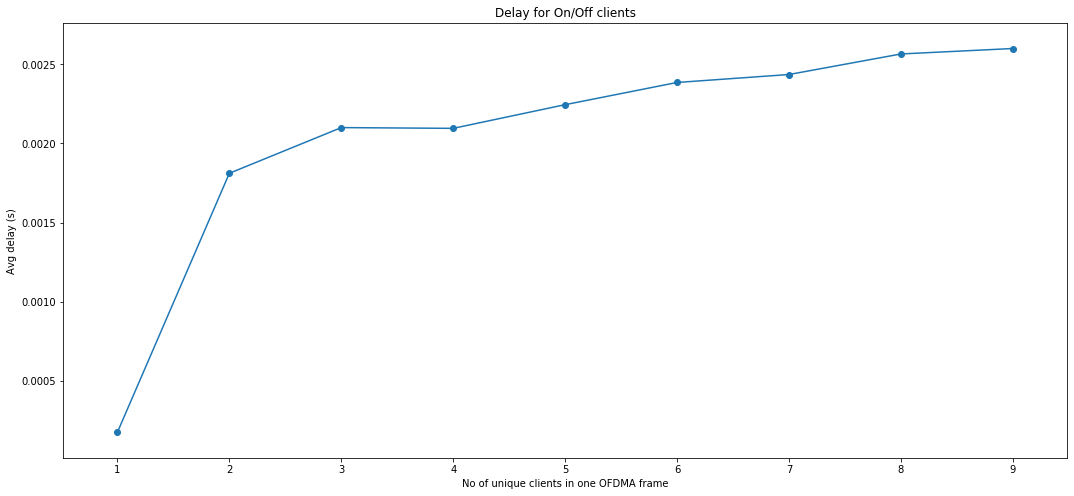

In [54]:
plt.plot(x3, y3)
plt.scatter(x3,y3)
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('No of unique clients in one OFDMA frame')
plt.ylabel("Avg delay (s)")
plt.title("Delay for On/Off clients")

fig = plt.gcf()
fig.set_size_inches(18,8)
plt.show()


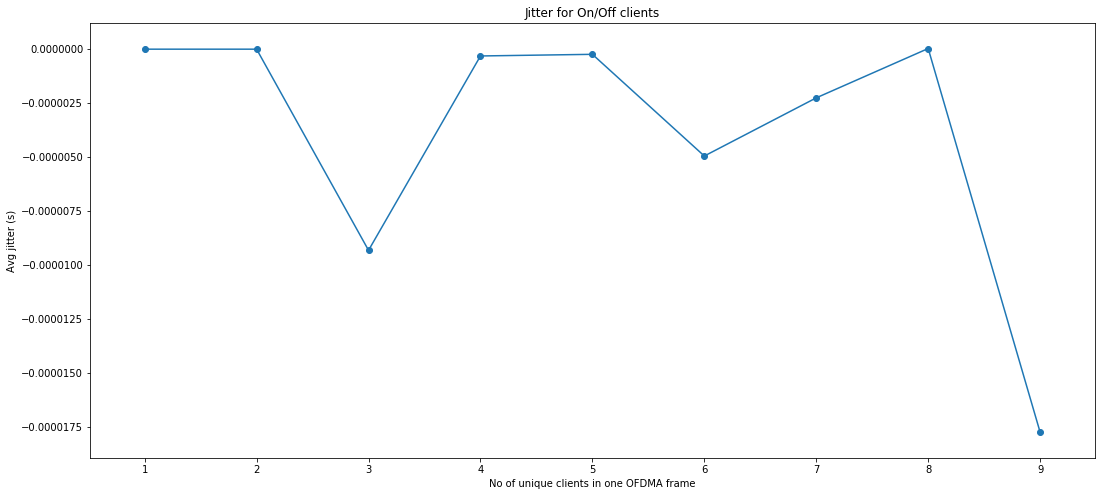

In [111]:
plt.plot(x3_jitter, y3_jitter)
plt.scatter(x3_jitter,y3_jitter)
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('No of unique clients in one OFDMA frame')
plt.ylabel("Avg jitter (s)")
plt.title("Jitter for On/Off clients")

fig = plt.gcf()
fig.set_size_inches(18,8)
plt.show()

# Rough/Previous work

In [ ]:
type(bulk_client_set)

In [ ]:
x=set()
x.add(1)
x.add(2)
x

In [ ]:
y = [3,4,5,6]
if x.intersection(y) == set():
    print("null")
else:
    print(x.intersection(y))

In [ ]:
eg= {}

In [ ]:
len(eg.keys())

In [ ]:
if eg:
    print("exist")

In [ ]:
for j in reversed(range(8)):
    print(j)

## Calculating rtt for ofdma frame

In [ ]:
rtt = []

In [ ]:
type(pcap['Info'][90])

In [ ]:
for ind in pcap.index:
    #print(ind)
    if(type(pcap['Info'][ind]) != float):
        #print('2')
        if (pcap['Info'][ind].startswith('Trigger')):
            if(pcap['Protocol'][ind-1] == 'TCP' or pcap['Protocol'][ind-1] == 'Gryphon'):
                if(pcap['Source'][ind-1] == '192.168.1.1'):
                    if(pcap['Info'][ind+1].startswith('802.11 Block Ack')):
                        rtt.append(pcap['Time'][ind+1] - pcap['Time'][ind-1])
                        #print(pcap['Time'][ind+1] - pcap['Time'][ind-1])

In [ ]:
rtt

In [ ]:
avg_rtt = sum(rtt)/len(rtt)

In [ ]:
avg_rtt

## Calculating rtt for a client

In [ ]:
rtt_client = []


In [ ]:
for ind in pcap.index:
    #print(ind)
    if(type(pcap['Info'][ind]) != float):
        #print('2')
        if (pcap['Info'][ind].startswith('Trigger')):
            if(pcap['Protocol'][ind-1] == 'TCP' or pcap['Protocol'][ind-1] == 'Gryphon'):
                if(pcap['Source'][ind-1] == '192.168.1.1' and pcap['Destination'][ind-1] == '192.168.1.2'):
                    if(pcap['Info'][ind+1].startswith('802.11 Block Ack')):
                        rtt_client.append(pcap['Time'][ind+1] - pcap['Time'][ind-1])
                        #print(pcap['Time'][ind+1] - pcap['Time'][ind-1])

## Calculating delay AND Jitter

In [ ]:
#for client 
Clients = ['192.168.1.2','192.168.1.3','192.168.1.4','192.168.1.5','192.168.1.6','192.168.1.7','192.168.1.8','192.168.1.9','192.168.1.10','192.168.1.11','192.168.1.12','192.168.1.13','192.168.1.14','192.168.1.15','192.168.1.16','192.168.1.17','192.168.1.18','192.168.1.19','192.168.1.20','192.168.1.21','192.168.1.22','192.168.1.23','192.168.1.24','192.168.1.25','192.168.1.26','192.168.1.27','192.168.1.28','192.168.1.29','192.168.1.30','192.168.1.31']
print(len(Clients))
print(Clients)
print(type(Clients))
print(type(Clients[0]))

In [ ]:
#client 0

In [ ]:
temp1 = pcap['Protocol']=='Gryphon' 
temp2  = pcap['Destination'] == Clients[0]

In [ ]:
temp = temp1 & temp2

In [ ]:
pcap[temp]

In [ ]:
time1 = pcap[temp]['Time'].to_numpy()

In [ ]:
type(time1)

In [ ]:
time1

In [ ]:
pcap1 = pd.read_csv("STA8/STA_pcap-0-0.csv")

In [ ]:
pcap1

In [ ]:
tempp = pcap1['Protocol'] == 'TCP'
pcap1[tempp]

In [ ]:
time2 = pcap1[tempp]['Time'].to_numpy()

In [ ]:
time2

In [ ]:
delay = time2-time1

In [ ]:
delay

## Throughput

In [ ]:
#bulk clients 

In [ ]:
pcap

In [ ]:
temp1 = pcap['Destination']== Clients[1]
temp2 = pcap['Destination'] == Clients[5]
temp5 = pcap['Destination'] == Clients[9]
temp6 = pcap['Destination'] == Clients[13]
temp7 = pcap['Destination'] == Clients[17]
temp8 = pcap['Destination'] == Clients[21]
temp9 = pcap['Destination'] == Clients[25]
temp10 = pcap['Destination'] == Clients[29]
temp3 = pcap['Protocol'] == 'TCP'
temp4 = pcap['Protocol'] == 'Gryphon'

In [ ]:
temp = (temp1|temp2|temp5|temp6|temp7|temp8|temp9) & (temp4 | temp3)

In [ ]:
pcap[temp]

In [ ]:
pcap[temp].info()

In [ ]:
total_packet_sent = pcap[temp]['Packet Length'].sum()

In [ ]:
total_packet_sent

In [ ]:
total_time = pcap[temp]['Time'].tail(1)

In [ ]:
total_time

In [ ]:
avg_throughput = total_packet_sent/total_time

In [ ]:
avg_throughput